# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
   

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    # Find review texts
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()

df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | I’ve flown with many airline...
1,✅ Trip Verified | I recently flew from New Y...
2,Not Verified | BA business class in Europe h...
3,✅ Trip Verified | Our flight started in Seattl...
4,✅ Trip Verified | British Airways Flight fro...
...,...
995,✅ Trip Verified | I flew yesterday from Heath...
996,✅ Trip Verified | The first part from Brussel...
997,✅ Trip Verified | Stockholm to London. Worst ...
998,✅ Trip Verified | Seems like no one was aware ...


In [6]:
# Ensure data folder exists
if not os.path.exists('data'):
    os.makedirs('data')

In [7]:
df.to_csv("data/BA_reviews2.csv", index=False)
print("Data saved to data/BA_reviews2.csv")

Data saved to data/BA_reviews2.csv


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Cleaning and Preprocessing

In [8]:
df['reviews'] = df['reviews'].str.split('|',expand=True)[1]

df.head(5)

,reviews
0,"I’ve flown with many airlines, but my recent ..."
1,I recently flew from New York back to Londo...
2,BA business class in Europe has a seat the ...
3,Our flight started in Seattle Wa heading to L...
4,British Airways Flight from Edinburgh got d...


### a)lower all the cases

In [9]:
df['reviews']=df['reviews'].str.lower()
df.head(10)

,reviews
0,"i’ve flown with many airlines, but my recent ..."
1,i recently flew from new york back to londo...
2,ba business class in europe has a seat the ...
3,our flight started in seattle wa heading to l...
4,british airways flight from edinburgh got d...
5,british airways world traveller plus (premi...
6,ba is barely a step above low cost airlines...
7,happy with the flight crew. hadn't been on a...
8,horrible service from boarding to landing. ...
9,my wife and i are very disappointed with fly...


### b) Removing special characters,stopswords,url,html tags,additional spaces 

In [10]:
from nltk.corpus import stopwords
import re
%pip install lxml


df['reviews']=df['reviews'].apply(lambda x:re.sub('[^A-Z a-z 0-9-]+',' ',x))
df['reviews']=df['reviews'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')])) 
df['reviews']=df['reviews'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
df['reviews']=df['reviews'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
df['reviews']=df['reviews'].apply(lambda x: " ".join(x.split()))


df.head(10)

Note: you may need to restart the kernel to use updated packages.


,reviews
0,flown many airlines recent experience british ...
1,recently flew new york back london ba first lo...
2,ba business class europe seat economy simply e...
3,flight started seattle wa heading lisbon portu...
4,british airways flight edinburgh got delayed 1...
5,british airways world traveller plus premium e...
6,ba barely step low cost airlines try dime nick...
7,happy flight crew plane 20 years stressed made...
8,horrible service boarding landing flew london ...
9,wife disappointed flying british airways fligh...


### c)Apply lemmatizer

In [11]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [12]:
df['reviews']=df['reviews'].apply(lambda x:lemmatize_words(x))
df.head(10)

,reviews
0,flown many airline recent experience british a...
1,recently flew new york back london ba first lo...
2,ba business class europe seat economy simply e...
3,flight started seattle wa heading lisbon portu...
4,british airway flight edinburgh got delayed 1 ...
5,british airway world traveller plus premium ec...
6,ba barely step low cost airline try dime nicke...
7,happy flight crew plane 20 year stressed made ...
8,horrible service boarding landing flew london ...
9,wife disappointed flying british airway flight...


In [13]:
df['reviews'].isnull().sum()

0

##  Apply Sentiment Analysis: 

Analyze the sentiment of the reviews to understand overall customer sentiment towards British Airways. Classify each review as positive, negative, or neutral.



In [14]:
%pip install vaderSentiment
%pip install textblob

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis and store the results in new columns
df['sentiment_scores'] = df['reviews'].apply(get_sentiment)

sentiment_counts = df['sentiment_scores'].value_counts(normalize=True)
df.head()

,reviews,sentiment_scores
0,flown many airline recent experience british a...,Positive
1,recently flew new york back london ba first lo...,Positive
2,ba business class europe seat economy simply e...,Positive
3,flight started seattle wa heading lisbon portu...,Positive
4,british airway flight edinburgh got delayed 1 ...,Positive


In [16]:

sentiment_counts 

sentiment_scores
Positive    0.555
Negative    0.427
Neutral     0.018
Name: proportion, dtype: float64

In [17]:
import pandas as pd
from textblob import TextBlob

# Function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            return 'Positive'
        elif polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Unknown'
#df['Sentiment'] = df['reviews'].apply(get_sentiment)
#df.head()

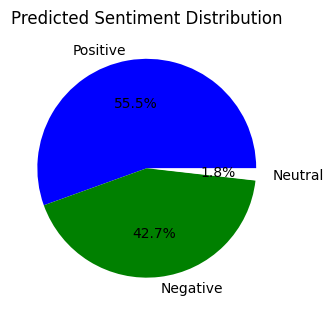

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 2)
plt.title("Predicted Sentiment Distribution")
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, explode=(0, 0, 0.05),autopct='%1.1f%%', shadow=False, colors=("blue", "green","white"))# explode the Positive slice
plt.show()

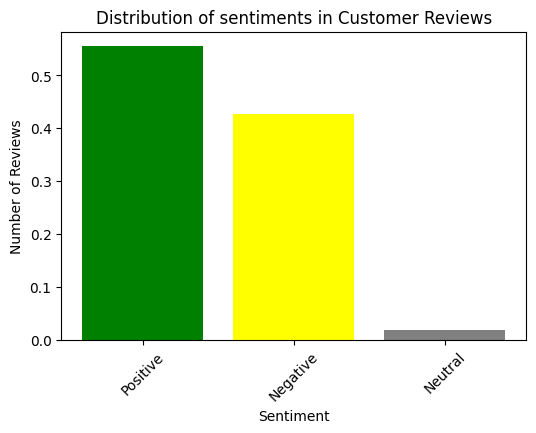

In [20]:
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'yellow', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of sentiments in Customer Reviews')
plt.xticks(rotation=45)
plt.show()

## Word Clouds: 
Create word clouds to visually represent the most frequent words appearing in positive and negative reviews separately. This can give a quick overview of what customers are talking about the most.



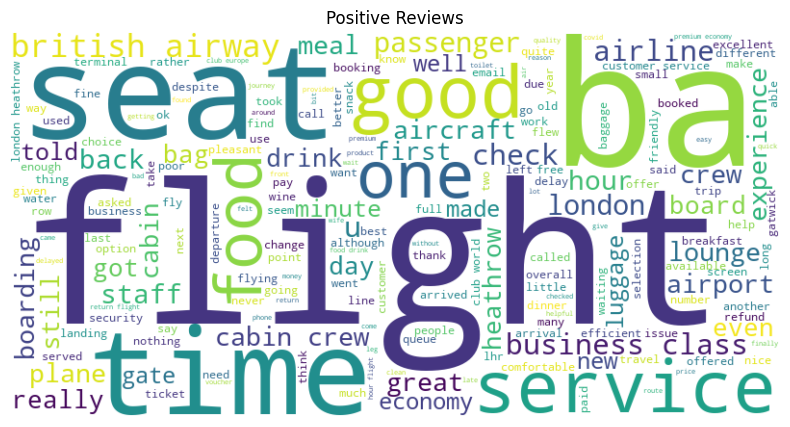

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Filter the DataFrame based on the 'Sentiment' column
positive_text = ' '.join(df[df['sentiment_scores'] == 'Positive']['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.show()

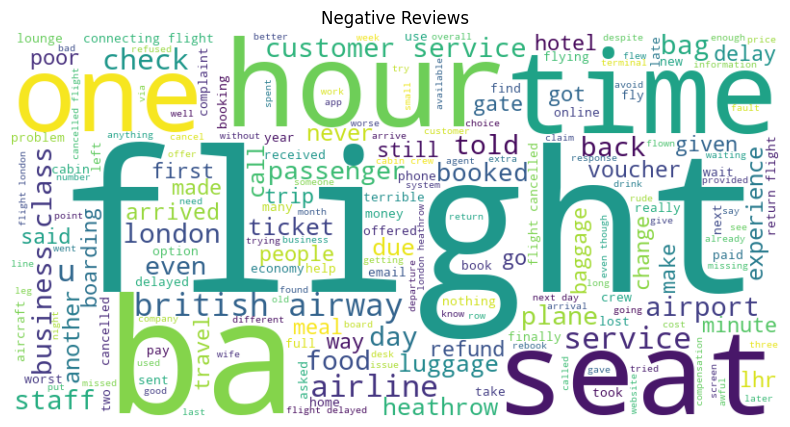

In [30]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame based on the 'Sentiment' column
Negative_text = ' '.join(df[df['sentiment_scores'] == 'Negative']['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

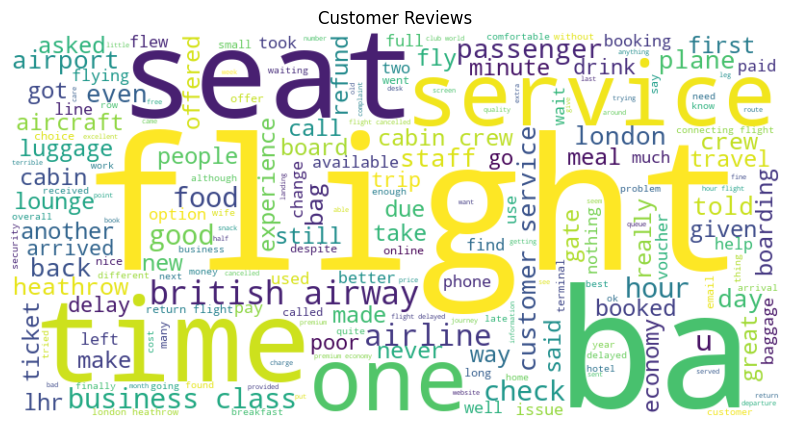

In [21]:
from wordcloud import WordCloud

# Combine all the reviews into a single text
combined_text = " ".join(review for review in df['reviews'])

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Customer Reviews')
plt.show()

In [23]:
df['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

## Topic Modeling:

 Use techniques like Latent Dirichlet Allocation (LDA) to discover topics within the reviews. This will help identify common themes or subjects that customers are talking about.

In [24]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Tokenize reviews for LDA
tokenized_reviews = [review.split() for review in df['reviews']]

# Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')


Topic 0: 0.030*"flight" + 0.022*"ba" + 0.009*"seat" + 0.008*"business" + 0.007*"service" + 0.006*"time" + 0.006*"airline" + 0.006*"class" + 0.006*"hour" + 0.006*"-"
Topic 1: 0.015*"flight" + 0.013*"ba" + 0.009*"service" + 0.008*"seat" + 0.008*"u" + 0.008*"hour" + 0.008*"airport" + 0.007*"one" + 0.007*"customer" + 0.007*"british"
Topic 2: 0.037*"flight" + 0.014*"ba" + 0.010*"hour" + 0.009*"service" + 0.009*"time" + 0.008*"british" + 0.008*"u" + 0.008*"airway" + 0.007*"seat" + 0.007*"london"
Topic 3: 0.018*"ba" + 0.017*"flight" + 0.015*"good" + 0.013*"food" + 0.012*"seat" + 0.011*"crew" + 0.009*"service" + 0.009*"cabin" + 0.008*"time" + 0.008*"club"
Topic 4: 0.018*"flight" + 0.012*"seat" + 0.011*"service" + 0.010*"class" + 0.009*"business" + 0.009*"time" + 0.008*"ba" + 0.007*"crew" + 0.007*"drink" + 0.007*"food"


# Conclusion

* There is a general leaning towards positive sentiment, but the large number of negative reviews suggests that there are still substantial areas for improvement, likely in the domains of flight time management, customer service, and in-flight comfort.

* In all reviews, "flight," "seat," "time," and "service" are frequently mentioned, demonstrating that customers comment on these areas in both positive and negative ways.

* In addition to food, cabin conditions are also discussed by customers when they talk about their travel experience.

* In positive reviews, business class and premium seats were frequently mentioned, while discomfort with economy seats appeared frequently in negative reviews.

* Specific flight routes and locations, such as London and Heathrow, are mentioned, suggesting that some discussions may revolve around evaluations of flights to and from the UK.

* There were frequent mishandling of baggage and long waiting times at airports which contributed to the negative sentiments.

* The majority of feedback is either satisfied or dissatisfied, so neutral reviews are rare.